In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', 500)
import gc
import warnings
warnings.filterwarnings("ignore")
gc.collect()

174

In [76]:
df=pd.read_csv("US_ACcidents_Dec19.csv")

In [77]:
df.sample(2)

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1856092,A-1856115,MapQuest,201.0,2,2018-02-20 07:38:32,2018-02-20 08:38:11,30.248291,-81.593697,NaN,NaN,0.0,Accident on FL-202 J Turner Butler Blvd Westbo...,NaN,J Turner Butler Blvd E,R,Jacksonville,Duval,FL,32216,US,US/Eastern,KCRG,2018-02-20 07:37:00,69.1,NaN,100.0,30.36,10.0,SE,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1727566,A-1727589,MapQuest,246.0,2,2018-04-18 07:54:37,2018-04-18 08:24:16,29.686876,-95.378777,NaN,NaN,0.0,Three lanes blocked due to accident on TX-288 ...,NaN,Holly Hall St,R,Houston,Harris,TX,77021,US,US/Central,KMCJ,2018-04-18 07:55:00,69.8,NaN,73.0,29.96,9.0,Variable,5.8,NaN,Scattered Clouds,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


# I) Preprocessing

#### 1) Handling missing value

In [79]:
df.isnull().sum()

ID                             0
Source                         0
TMC                       728071
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2246264
End_Lng                  2246264
Distance(mi)                   0
Description                    1
Number                   1917605
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      880
Country                        0
Timezone                    3163
Airport_Code                5691
Weather_Timestamp          36705
Temperature(F)             56063
Wind_Chill(F)            1852623
Humidity(%)                59173
Pressure(in)               48142
Visibility(mi)             65691
Wind_Direction             45101
Wind_Speed(mph)           440840
Precipitat

In [86]:
df.TMC.value_counts()

201.0    1890037
241.0     219071
245.0      35919
229.0      22653
203.0      16792
222.0      12552
244.0      11163
406.0       9467
246.0       6350
202.0       6047
343.0       5827
247.0       4616
236.0       2116
206.0       1157
248.0       1012
339.0        774
341.0        504
336.0         81
200.0         66
239.0         54
351.0          6
Name: TMC, dtype: int64

In [160]:
df_clean=df.copy()

#Use 'Others' for null city, zipcode, airport code
df_clean['City']=df['City'].fillna('Others')
df_clean['Zipcode']=df['Zipcode'].fillna('Others')
df_clean['Airport_Code']=df['Airport_Code'].fillna('Others')

#Use central time for null Timezone
df_clean['Timezone']=df['Timezone'].fillna('US/Central')
df_clean['Weather_Timestamp']=df_clean['Weather_Timestamp'].fillna(df['Start_Time'])

#Drop Pressure, Wind_Direction
df_clean=df.drop(['Pressure(in)','Wind_Direction','Number','End_Lat', 'End_Lng', 'Precipitation(in)'], axis=1)


#Use average on mean for Temperature, Wind_Chill, Humidity, Visibility(mi), WindSpeed
df_clean['Temperature(F)']=df['Temperature(F)'].fillna(df['Temperature(F)'].mean())
df_clean['Wind_Chill(F)']=df['Wind_Chill(F)'].fillna(df['Wind_Chill(F)'].mean())
df_clean['Humidity(%)']=df['Humidity(%)'].fillna(df['Humidity(%)'].mean())
df_clean['Visibility(mi)']=df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean())
df_clean['Wind_Speed(mph)']=df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean())

# Visibility, Wind_Speed, Precipitation, Weather_Condition
df_clean['Weather_Condition']=df['Weather_Condition'].fillna(df['Weather_Condition'].mode())


In [161]:
#Fill 0 for TMC and mode for weather condition
df_clean['TMC']=df_clean['TMC'].fillna(0)
df_clean['Weather_Condition']=df_clean['Weather_Condition'].fillna(df_clean['Weather_Condition'].mode())

In [162]:
df_clean.isnull().sum()

ID                           0
Source                       0
TMC                          0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
Distance(mi)                 0
Description                  1
Street                       0
Side                         0
City                        83
County                       0
State                        0
Zipcode                    880
Country                      0
Timezone                  3163
Airport_Code              5691
Weather_Timestamp        36705
Temperature(F)               0
Wind_Chill(F)                0
Humidity(%)                  0
Visibility(mi)               0
Wind_Speed(mph)              0
Weather_Condition        65932
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway 

In [163]:
#Drop nan
df_clean=df_clean.dropna()

In [164]:
df_clean.shape

(2908322, 43)

#### 2) Feature engineering

In [166]:
# Convert Start_Time and End_Time to datetypes
df_clean['Start_Time'] = pd.to_datetime(df_clean['Start_Time'])
df_clean['End_Time'] = pd.to_datetime(df_clean['End_Time'])
df_clean['duration']=round((df_clean['End_Time']-df_clean['Start_Time'])/np.timedelta64(1,'m'))
df_clean=df_clean[df_clean.duration>0]

# Extract year, month, day, hour and weekday
df_clean['Year']=df_clean['Start_Time'].dt.year
df_clean['Month']=df_clean['Start_Time'].dt.strftime('%b')
df_clean['Day']=df_clean['Start_Time'].dt.day
df_clean['Hour']=df_clean['Start_Time'].dt.hour
df_clean['Weekday']=df_clean['Start_Time'].dt.strftime('%a')

#### 3) Delete Outlier

In [167]:
#Outlier
lower=df_clean.duration.mean()-3*df_clean.duration.std()
upper=df_clean.duration.mean()+3*df_clean.duration.std()
df_clean=df_clean[(df_clean.duration>lower) & (df_clean.duration<upper)]

In [168]:
# Out put data for visualization
df_clean.to_csv("Clean_data.csv", index=False )

In [ ]:
# #Out_put a shorter version
# list_=["Severity","Start_Lat","Start_Lng", "City", 
# "County", "State", "Zipcode", "Timezone", "duration", 
#        "Year", "Month","Day","Hour", "Weekday"]
# df_clean[list_].to_csv("crop_clean_data.csv",index=False)

# III) Machine Learning

In [361]:
#Only select TX
df_TX=df_clean[df_clean.State=='TX']
df_TX.shape

(291294, 49)

In [363]:
#Drop feature that is too hard to process
df_TX=df_TX.drop(['ID','Source','Description','Zipcode',
             'Airport_Code','Street','State', 'Country'],axis=1)

In [364]:
df_TX.head(1)

,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Side,City,County,Timezone,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,duration,Year,Month,Day,Hour,Weekday
261007,201.0,2,2016-11-30 16:03:54,2016-11-30 17:20:00,30.336502,-97.755646,0.01,R,Austin,Travis,US/Central,2016-11-30 15:51:00,66.0,51.326849,24.0,10.0,5.8,Clear,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,76.0,2016,Nov,30,16,Wed


#### 1) Encode columns

In [365]:
from category_encoders import BinaryEncoder

In [366]:
#Convert T anf F to 0 and 1
temp=['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway',
  'Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']
df_TX[temp]=df_TX[temp].astype(int)

In [367]:
#Same as above 
temp=['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight']
for i in temp:
    df_TX[i]=df_TX[i].apply(lambda x: 1 if x=='Day' else 0)

In [368]:
#One Hot encoding
temp=['Side','Timezone','Month','Weekday']
df_temp=pd.get_dummies(df_TX[temp])
df_TX=df_TX.drop(temp,axis=1)
df_TX=pd.concat([df_TX,df_temp],axis=1)

In [369]:
#Binary encoding high cardinality
temp=['City','County','Weather_Condition']

be=BinaryEncoder(cols=temp)
newdata=be.fit_transform(df_TX[temp])

df_TX=pd.concat([df_TX,newdata],axis=1)

In [370]:
df_TX=df_TX.drop(['City','County','Weather_Condition',
                  'Weather_Timestamp','Start_Time','End_Time'],axis=1)

#### 2) Feature Importance

In [371]:
from sklearn.ensemble import RandomForestClassifier

In [372]:
X=df_TX.drop(['Severity'],axis=1)
y=df_TX['Severity']

In [373]:
clf = RandomForestClassifier()
clf.fit(X, y)

list_feature=[]
for feature_score in zip(X.columns, clf.feature_importances_):
    list_feature.append(feature_score)
list_feature.sort(key = lambda x: x[1], reverse=True) 

In [374]:
list_feature[:6]

[('Start_Lng', 0.11461272717174958),
 ('Start_Lat', 0.1143808496769118),
 ('TMC', 0.10199390653997026),
 ('Humidity(%)', 0.04635075381362031),
 ('Temperature(F)', 0.04612078329453929),
 ('duration', 0.04549782297574293)]

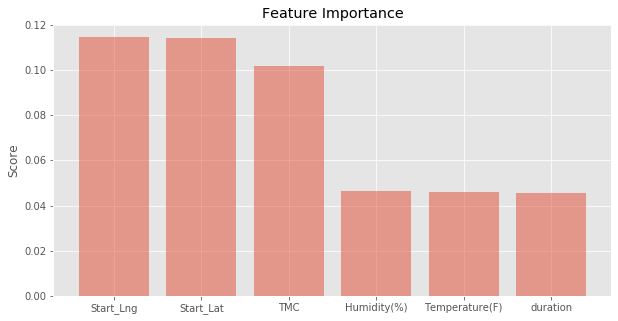

In [375]:
objects = [i[0] for i in list_feature[:6]]
y_pos = np.arange(len(objects))
performance = [i[1] for i in list_feature[:6]]

plt.figure(figsize=(10,5))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Score')
plt.title('Feature Importance')

plt.show()

#### 3) Validation accuracy

In [376]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold

In [377]:
X=df_TX.drop(['Severity'],axis=1)
y=df_TX['Severity']

In [378]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10)

In [379]:
#Logistic regression
start=time.time()
lr=LogisticRegression()
score_lr=cross_val_score(lr,X,y,cv=3)
duration_lr=round(time.time()-start,2)

In [380]:
# Random forest
start=time.time()
clf = RandomForestClassifier()
score_rf=cross_val_score(lr,X,y,cv=3)
duration_rf=round(time.time()-start,2)

In [381]:
# Score XGB Classifier
start=time.time()
XGB = XGBClassifier()
score_xgb=cross_val_score(XGB,X,y,cv=3)
duration_xgb=round(time.time()-start,2)

In [382]:
duration_xgb

830.35

In [383]:
(score_lr.std(), score_rf.std(), score_xgb.std())

(0.07971908574835238, 0.07971908574835238, 0.10571289133369309)

In [384]:
(score_lr.mean(), score_rf.mean(), score_xgb.mean())
(score_lr.std(), score_rf.std(), score_xgb.std())
(duration_lr,duration_rf,duration_xgb)

(70.79, 59.98, 830.35)

In [387]:
(score_lr.mean(), score_rf.mean(), score_xgb.mean())

(0.6603253651277715, 0.6603253651277715, 0.6676407634056871)

<Figure size 1440x1440 with 0 Axes>

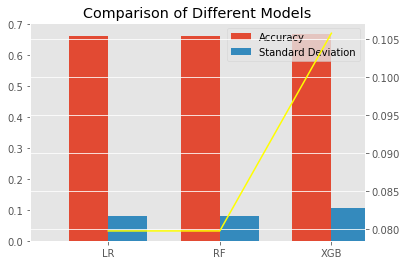

In [385]:
plt.figure(figsize=(20,20))
width = 0.7 # width of a bar

m1_t = pd.DataFrame({
 'Accuracy' : (score_lr.mean(), score_rf.mean(), score_xgb.mean()),
 'Standard Deviation' : (score_lr.std(), score_rf.std(), score_xgb.std()),
 'duration' : (duration_lr,duration_rf,duration_xgb),})



m1_t[['Accuracy','Standard Deviation']].plot(kind='bar', width = width)
m1_t['Standard Deviation'].plot(secondary_y=True,color="yellow")

ax = plt.gca()
plt.xlim([-width, len(m1_t['duration'])-width])
ax.set_xticklabels(('LR', 'RF', 'XGB'))
plt.title('Comparison of Different Models')

plt.show()

In [388]:
df_clean.Severity.unique()

array([3, 2, 1, 4])